# Problem Statement
The objective of the case study is to gauge the efficiency Austo Automobile's marketing campaign, to get an idea of the demand of customers which will help the company enhance the customer experience.

# 1. Data Overview

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('austo_automobile+%282%29+%281%29.csv')

In [4]:
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


In [5]:
df.shape

(1581, 14)

**The data has 1581 rows and 14 columns.**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.1+ KB


In [38]:
df.Gender.unique()

array(['Male', 'Femal', 'Female', nan, 'Femle'], dtype=object)

In [5]:
df['Gender'] = df['Gender'].replace('Femal','Female')
df['Gender'] = df['Gender'].replace('Femle','Female')

In [50]:
df.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

**Following is the list of Numerical columns.**

In [19]:
df.select_dtypes(include=np.number).columns

Index(['Age', 'No_of_Dependents', 'Salary', 'Partner_salary', 'Total_salary',
       'Price'],
      dtype='object')

In [12]:
df.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

**53 rows or 3.3% of 'Gender' data and 106 rows or 6.7% of 'Partner Salary' data is missing.**

In [22]:
df.describe().round(2)

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
count,1581.00,1581.00,1581.00,1475.00,1581.00,1581.00
mean,31.92,2.46,60392.22,20225.56,79626.00,35597.72
std,8.43,0.94,14674.83,19573.15,25545.86,13633.64
min,22.00,0.00,30000.00,0.00,30000.00,18000.00
25%,25.00,2.00,51900.00,0.00,60500.00,25000.00
50%,29.00,2.00,59500.00,25600.00,78000.00,31000.00
75%,38.00,3.00,71800.00,38300.00,95900.00,47000.00
max,54.00,4.00,99300.00,80500.00,171000.00,70000.00


# 2. Univariate Analysis

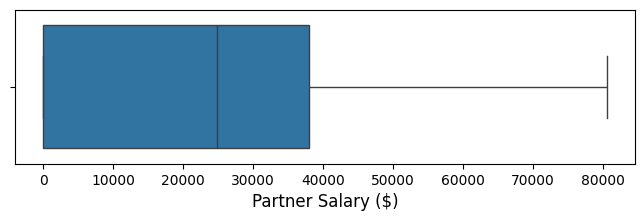

In [262]:
plt.figure(figsize=(8,2))
plt.xlabel('Partner Salary ($)',fontsize = 12)
sns.boxplot(data=df, x='Partner_salary');

**Count of Partner Salary being 0:**

In [35]:
df[df['Partner_salary']==0]['Partner_salary'].count()

623

**How many null values in Partner Salary:**

In [63]:
df['Partner_salary'].isnull().sum()

106

**Filling null values with mean:**

In [64]:
df['Partner_salary'].fillna(df['Partner_salary'].mean(), inplace=True)

In [65]:
df['Partner_salary'].isnull().sum()

0

**78.4% of the customers are Male:**

In [51]:
df['Gender'].value_counts(normalize=True)

Gender
Male      0.784686
Female    0.215314
Name: proportion, dtype: float64

**Distribution of Customer Age:**

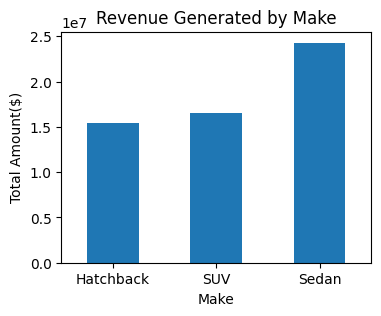

In [191]:
df.groupby('Make')['Price'].sum().plot(kind='bar', figsize=(4, 3));
plt.title("Revenue Generated by Make")
plt.ylabel('Total Amount($)')
plt.xlabel('Make')
plt.xticks(rotation=0);

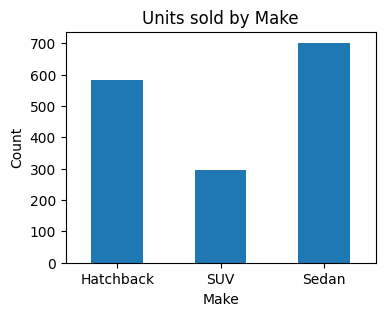

In [193]:
df.groupby('Make')['Make'].count().plot(kind='bar', figsize=(4, 3));
plt.title("Units sold by Make")
plt.ylabel('Count')
plt.xlabel('Make')
plt.xticks(rotation=0);

In [194]:
df.groupby('Make')['Make'].count()

Make
Hatchback    582
SUV          297
Sedan        702
Name: Make, dtype: int64

In [182]:
df[df['Price']>40000]['Make'].count()

508

In [188]:
df40 = df[df['Price']>40000]

In [233]:
df40.groupby('Make')['Price'].count()

Make
SUV      268
Sedan    240
Name: Price, dtype: int64

In [185]:
df[df['Price']>40000]['Price'].sum()

27003000

In [169]:
df['Price'].sum()

56280000

In [196]:
df.groupby('Make')['Price'].sum()

Make
Hatchback    15408000
SUV          16580000
Sedan        24292000
Name: Price, dtype: int64

In [197]:
df.groupby('Gender')['Price'].sum()

Gender
Female    15695000
Male      39348000
Name: Price, dtype: int64

In [198]:
df.groupby('Gender')['Gender'].count()

Gender
Female     329
Male      1199
Name: Gender, dtype: int64

In [220]:
df.groupby(['Marital_status','Gender'])['Gender'].count()

Marital_status  Gender
Married         Female     307
                Male      1088
Single          Female      22
                Male       111
Name: Gender, dtype: int64

In [200]:
df.groupby('Gender')['Total_salary'].sum()

Gender
Female    29178800
Male      93015000
Name: Total_salary, dtype: int64

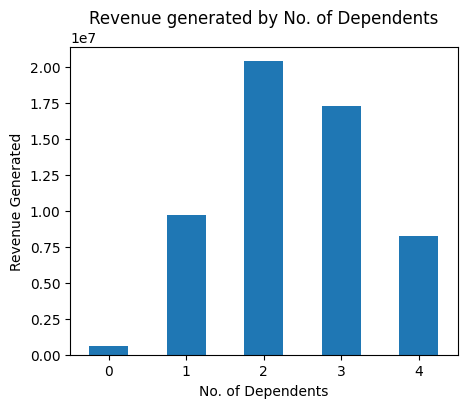

In [204]:
plt.figure(figsize=(5,4))
df.groupby('No_of_Dependents')['Price'].sum().plot(kind='bar');
plt.xticks(rotation=0);
plt.xlabel('No. of Dependents');
plt.ylabel('Revenue Generated')
plt.title("Revenue generated by No. of Dependents");

In [205]:
df1d = df[df['No_of_Dependents']==1]

In [ ]:
plt.figure(figsize=(4,3))
df1d.groupby('Make')['Make'].count().plot(kind='bar')
plt.xticks(rotation=0);
plt.xlabel('Make');
plt.ylabel('Count')
plt.title("Make preferred by 1 Dependents");

In [210]:
df23d = df[(df['No_of_Dependents']==2) | (df['No_of_Dependents']==3)]

In [227]:
df[df['Age']<31]['Age'].count()

958

In [228]:
df[df['Age']<31]['Price'].sum()

25724000

In [226]:
df[df['Gender']=='Male']['Price'].sum()

39348000

In [231]:
df[(df['Gender']=='Male') & (df['Age']<31)]['Gender'].count()

872

In [242]:
df[df['Make']=='Sedan']['Price'].mean()

34603.988603988604

In [247]:
df[(df['Make']=='Sedan') & (df['No_of_Dependents']==2)]['Price'].min()

18000

In [234]:
df[(df['Gender']=='Male') & (df['Age']<31) & (df['Marital_status']=='Married')]['Gender'].count()

786

In [225]:
df['Price'].sum()

56280000

In [212]:
df45 = df[df['Age']>45]

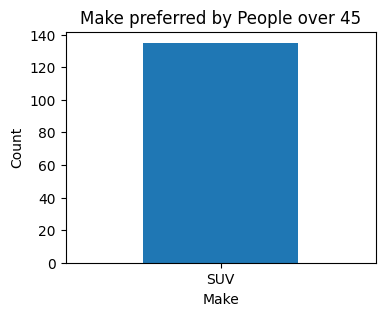

In [218]:
plt.figure(figsize=(4,3))
df45.groupby('Make')['Make'].count().plot(kind='bar')
plt.xticks(rotation=0);
plt.xlabel('Make');
plt.ylabel('Count')
plt.title("Make preferred by People over 45");

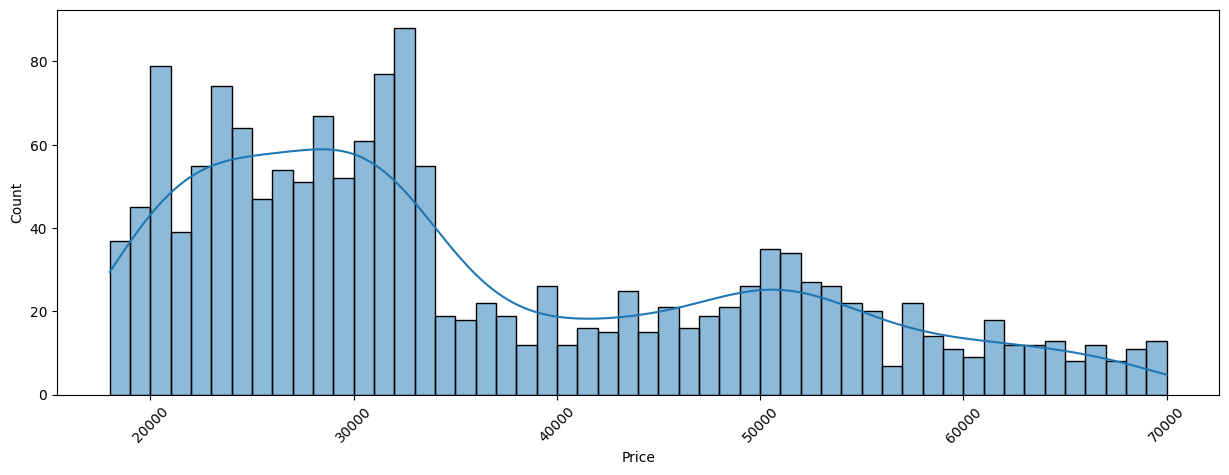

In [168]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x='Price', binwidth=1000, kde=True);
plt.xticks(rotation=45);

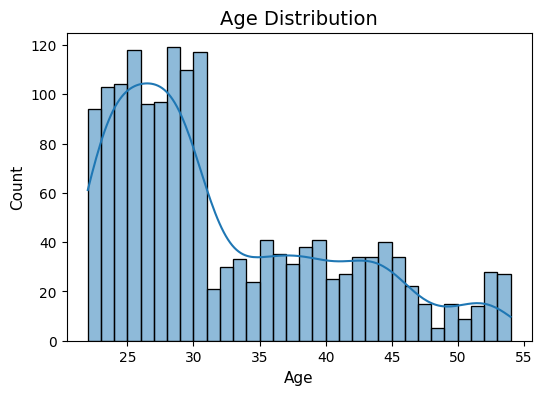

In [283]:
plt.figure(figsize=(6,4))
plt.xlabel('Age',fontsize = 11);
plt.ylabel('Count',fontsize = 11)
plt.title("Age Distribution",fontsize = 14)
sns.histplot(data=df, x='Age', kde=True, binwidth=1);

**Age distribution by Gender:**

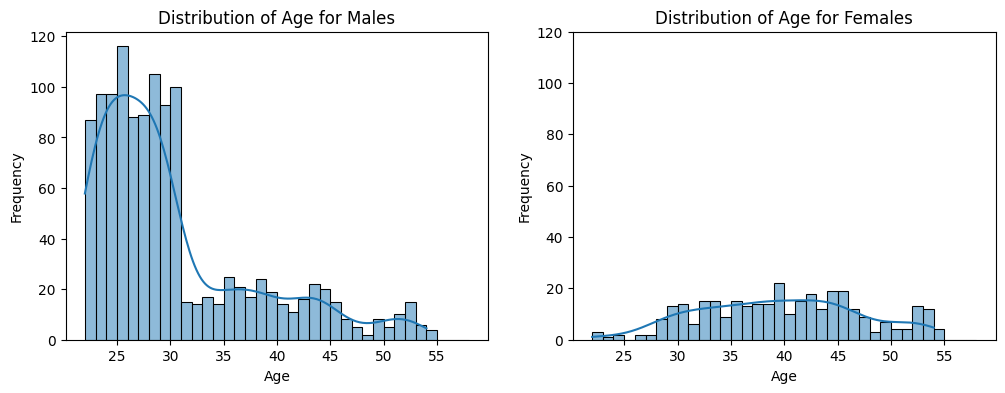

In [282]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
common_bins = range(min(df['Age']), max(df['Age'] + 5), 1)
sns.histplot(x=df[df['Gender']=='Male']['Age'], kde=True, ax=axes[0], bins=common_bins);
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Age for Males')
sns.histplot(x=df[df['Gender']=='Female']['Age'], kde=True, ax=axes[1], bins=common_bins);
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Age for Females')
axes[1].set_ylim(0,120);

In [295]:
(df['Age']<25).sum()

301

**301 or 1 in 5 customers are below 25 years of age**

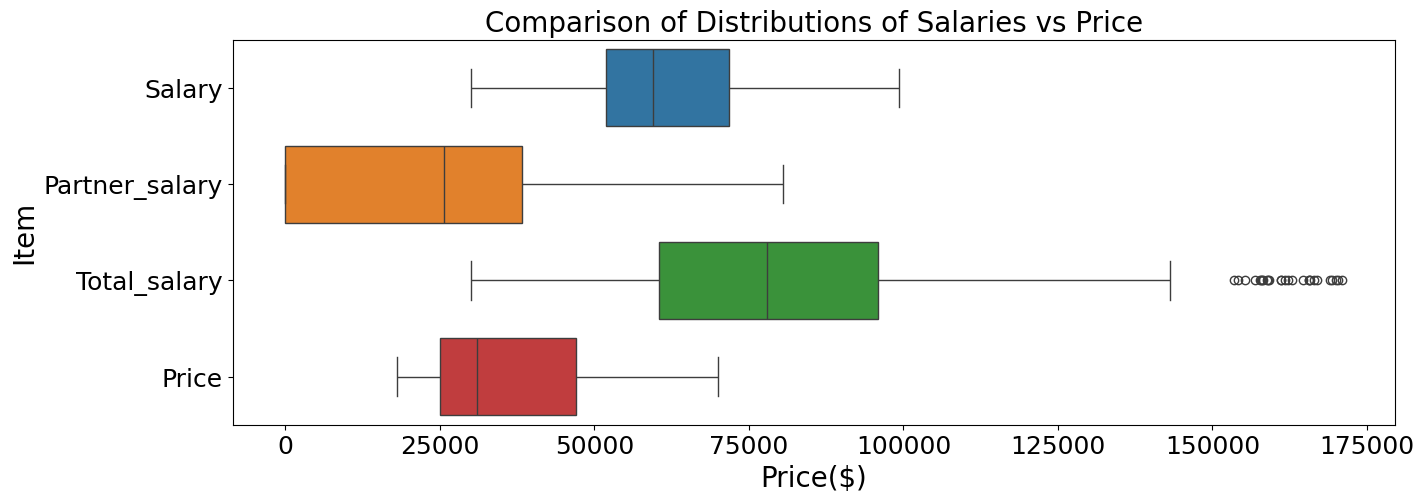

In [10]:
plt.figure(figsize=(15,5))
plt.title("Comparison of Distributions of Salaries vs Price", fontsize=20)
plt.ylabel('Item', fontsize=20)
plt.xlabel('Price($)', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
sns.boxplot(df[['Salary', 'Partner_salary','Total_salary', 'Price']], orient='h');

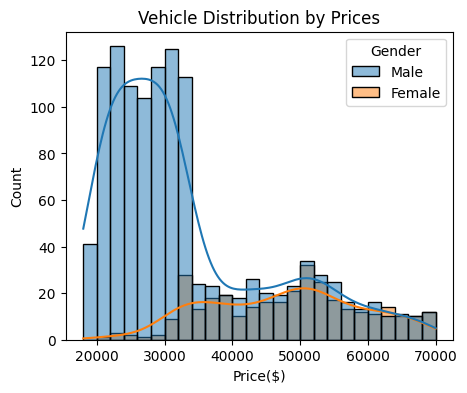

In [250]:
plt.figure(figsize=[5,4])
plt.title("Vehicle Distribution by Prices")
plt.ylabel('Count')
plt.xlabel('Price($)')
sns.histplot(data=df, x='Price', hue='Gender',kde=True, binwidth=2000);

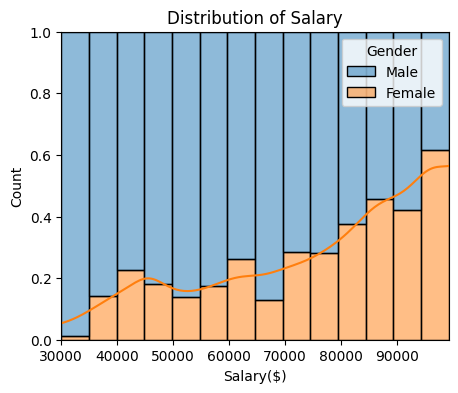

In [11]:
plt.figure(figsize=[5,4])
plt.title("Distribution of Salary")
plt.ylabel('Count')
plt.xlabel('Salary($)')
# plt.xticks(rotation=45)
sns.histplot(data=df, x='Salary', hue='Gender',kde=True, binwidth=5000, multiple='fill');

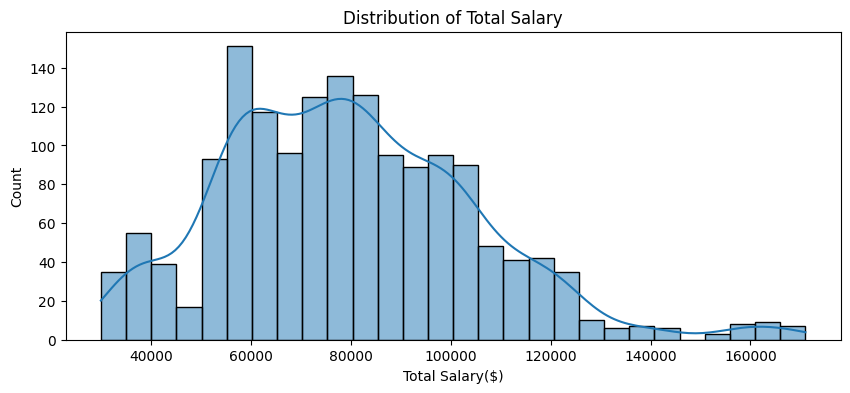

In [67]:
plt.figure(figsize=[10,4])
plt.title("Distribution of Total Salary")
plt.ylabel('Count')
plt.xlabel('Total Salary($)')
# plt.xticks(rotation=45)
sns.histplot(data=df, x='Total_salary', kde=True, binwidth=5000);

In [137]:
df['Salary'].quantile(.75)

71800.0

In [79]:
genderdata = df['Gender'].value_counts(normalize=True) * 100

**78.5% of customers are Male:**

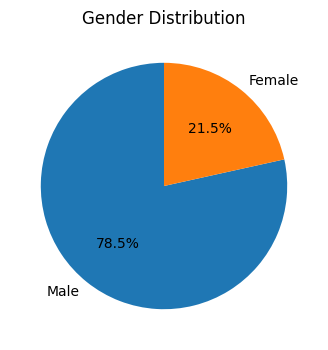

In [304]:
plt.figure(figsize=(4,4))
plt.title("Gender Distribution")
plt.pie(genderdata, labels=genderdata.index, autopct='%1.1f%%', startangle=90);

**91.3% of customers are married:**

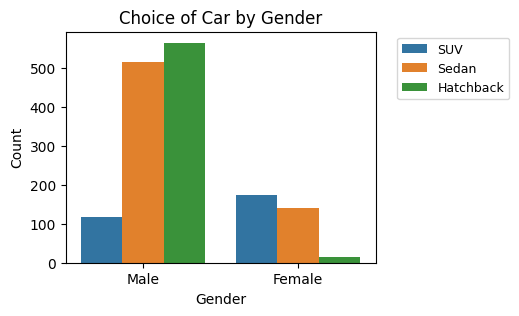

In [46]:
plt.figure(figsize=[4,3])
plt.title("Choice of Car by Gender")
plt.ylabel('Count')
plt.xlabel('Gender')
sns.countplot(data=df, x='Gender', hue='Make');
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=9);

In [47]:
(pd.crosstab(index=df['Gender'], columns=df['Make'], normalize='index', margins=True)*100).round(1)

Make,Hatchback,SUV,Sedan
Gender,,,
Female,4.6,52.6,42.9
Male,47.1,9.8,43.0
All,38.0,19.0,43.0


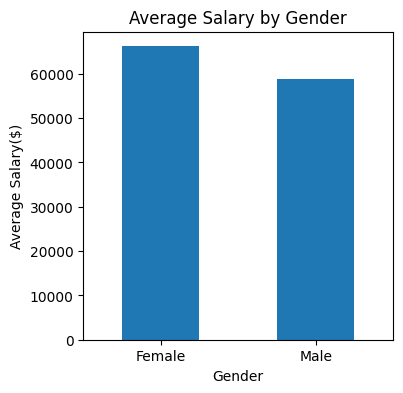

In [44]:
plt.figure(figsize=(4,4))
plt.title("Average Salary by Gender")
plt.xlabel('Gender')
plt.ylabel('Average Salary($)')
df.groupby('Gender')['Salary'].mean().plot(kind='bar');
plt.xticks(rotation=0);

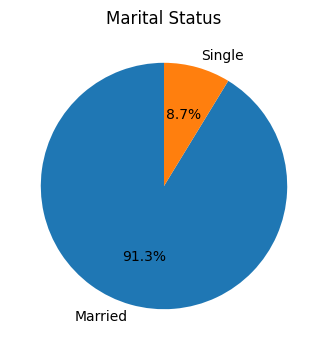

In [305]:
plt.figure(figsize=(4,4))
plt.title("Marital Status")
maritalstatus = df['Marital_status'].value_counts(normalize=True) * 100
plt.pie(maritalstatus, labels=maritalstatus.index, autopct='%1.1f%%', startangle=90);

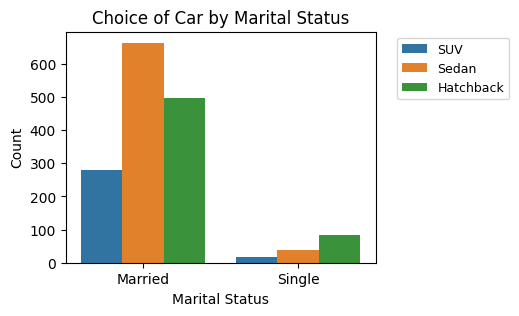

In [45]:
plt.figure(figsize=[4,3])
plt.title("Choice of Car by Marital Status")
plt.ylabel('Count')
plt.xlabel('Marital Status')
sns.countplot(data=df, x='Marital_status', hue='Make');
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=9);

In [44]:
(pd.crosstab(index=df['Marital_status'], columns=df['Make'], normalize='index', margins=True)*100).round(1)

Make,Hatchback,SUV,Sedan
Marital_status,,,
Married,34.5,19.5,46.0
Single,60.9,11.6,27.5
All,36.8,18.8,44.4


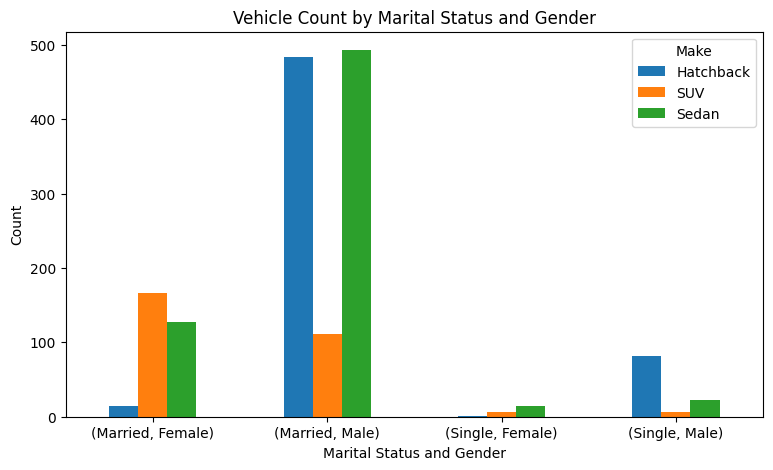

In [141]:
df.groupby(['Marital_status', 'Gender', 'Make'])['Make'].count().unstack().plot(kind='bar', figsize=(9, 5));
plt.title("Vehicle Count by Marital Status and Gender")
plt.ylabel('Count')
plt.xlabel('Marital Status and Gender')
plt.xticks(rotation=0);

**62.3% of customers are Post Graduate**

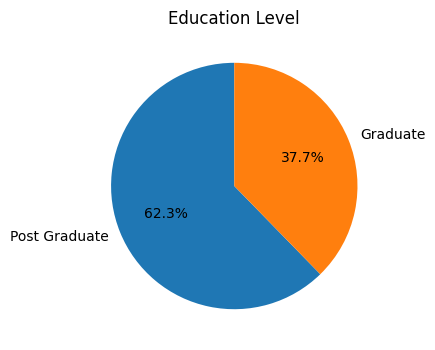

In [306]:
plt.figure(figsize=(4,4))
plt.title("Education Level")
edu = df['Education'].value_counts(normalize=True) * 100
plt.pie(edu, labels=edu.index, autopct='%1.1f%%', startangle=90);

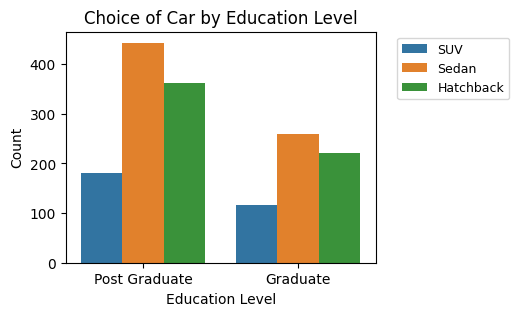

In [37]:
plt.figure(figsize=[4,3])
plt.title("Choice of Car by Education Level")
plt.ylabel('Count')
plt.xlabel('Education Level')
sns.countplot(data=df, x='Education', hue='Make');
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=9);

In [45]:
(pd.crosstab(index=df['Gender'], columns=df['Education'], normalize='index', margins=True)*100).round(1)

Education,Graduate,Post Graduate
Gender,,
Female,41.9,58.1
Male,36.6,63.4
All,37.8,62.2


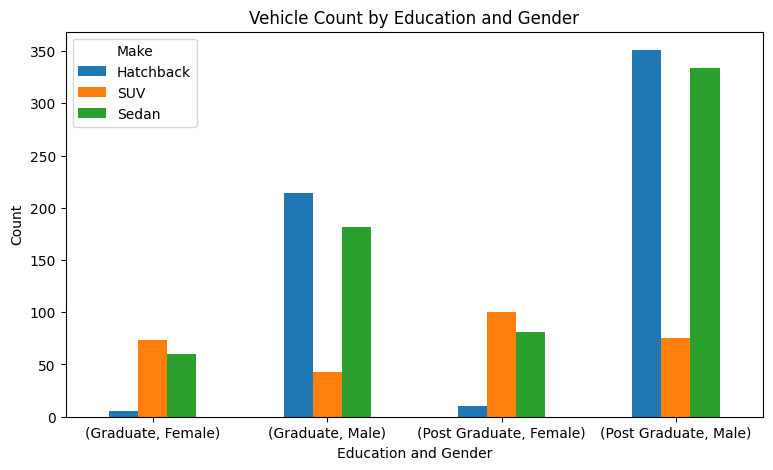

In [73]:
df.groupby(['Education', 'Gender', 'Make'])['Make'].count().unstack().plot(kind='bar', figsize=(9, 5));
plt.title("Vehicle Count by Education and Gender")
plt.ylabel('Count')
plt.xlabel('Education and Gender')
plt.xticks(rotation=0);

In [90]:
df['No_of_Dependents'] = df['No_of_Dependents'].astype('category')

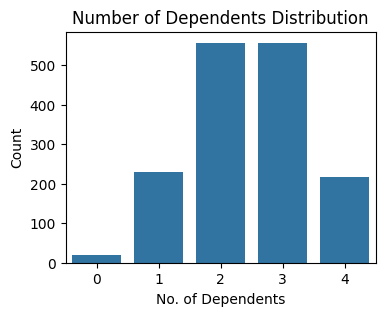

In [4]:
plt.figure(figsize=[4,3])
plt.title("Number of Dependents Distribution")
plt.ylabel('Count')
plt.xlabel('No. of Dependents')
sns.countplot(data=df, x='No_of_Dependents');

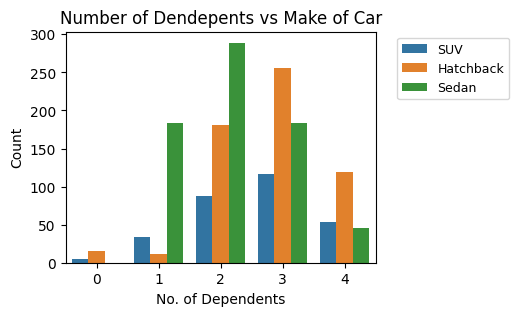

In [11]:
plt.figure(figsize=[4,3])
plt.title("Number of Dendepents vs Make of Car")
plt.ylabel('Count')
plt.xlabel('No. of Dependents')
sns.countplot(data=df, x='No_of_Dependents', hue='Make');
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=9);

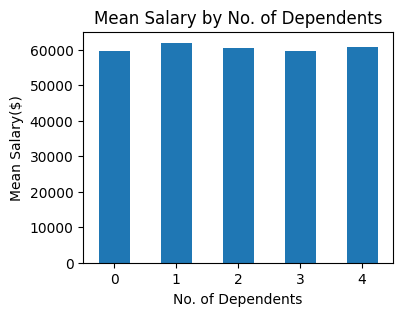

In [86]:
df.groupby('No_of_Dependents')['Salary'].mean().plot(kind='bar', figsize=(4, 3));
plt.title("Mean Salary by No. of Dependents")
plt.ylabel('Mean Salary($)')
plt.xlabel('No. of Dependents')
plt.xticks(rotation=0);

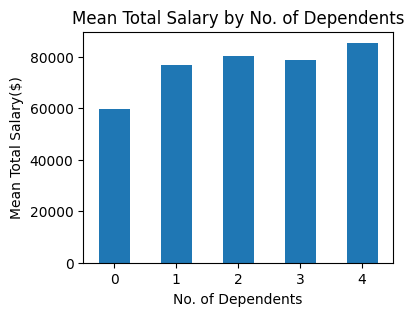

In [87]:
df.groupby('No_of_Dependents')['Total_salary'].mean().plot(kind='bar', figsize=(4, 3));
plt.title("Mean Total Salary by No. of Dependents")
plt.ylabel('Mean Total Salary($)')
plt.xlabel('No. of Dependents')
plt.xticks(rotation=0);

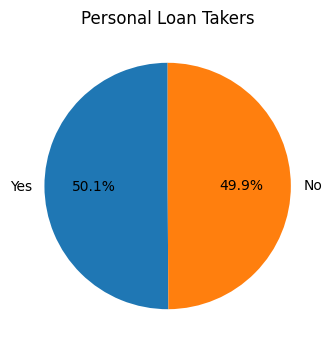

In [313]:
plt.figure(figsize=[4,4])
plt.title("Personal Loan Takers")
ploan = df['Personal_loan'].value_counts(normalize=True) * 100
plt.pie(ploan, labels=ploan.index, autopct='%1.1f%%', startangle=90);

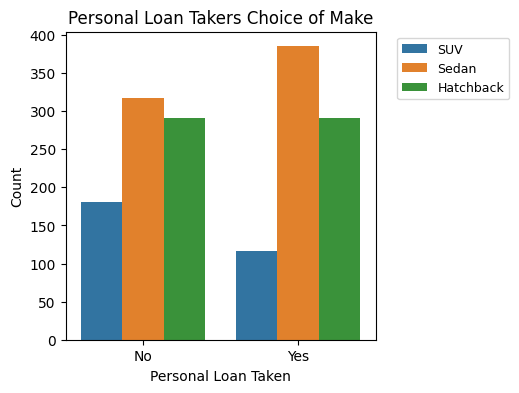

In [332]:
plt.figure(figsize=[4,4])
plt.title("Personal Loan Takers Choice of Make")
plt.ylabel('Count')
plt.xlabel('Personal Loan Taken')
sns.countplot(data=df, x='Personal_loan', hue='Make');
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=9);

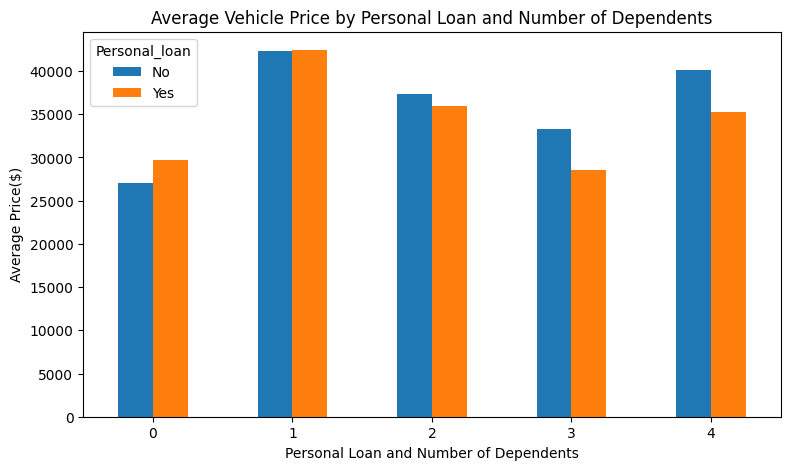

In [79]:
df.groupby(['No_of_Dependents','Personal_loan'])['Price'].mean().unstack().plot(kind='bar', figsize=(9, 5));
plt.title("Average Vehicle Price by Personal Loan and Number of Dependents")
plt.ylabel('Average Price($)')
plt.xlabel('Personal Loan and Number of Dependents')
plt.xticks(rotation=0);

In [48]:
(pd.crosstab(index=df['Personal_loan'], columns=df['Make'], normalize='index', margins=True)*100).round(1)

Make,Hatchback,SUV,Sedan
Personal_loan,,,
No,36.9,22.9,40.2
Yes,36.7,14.6,48.6
All,36.8,18.8,44.4


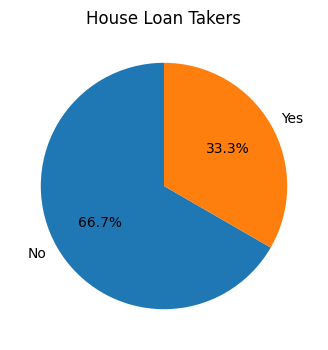

In [315]:
plt.figure(figsize=[4,4])
plt.title("House Loan Takers")
hloan = df['House_loan'].value_counts(normalize=True) * 100
plt.pie(hloan, labels=hloan.index, autopct='%1.1f%%', startangle=90);

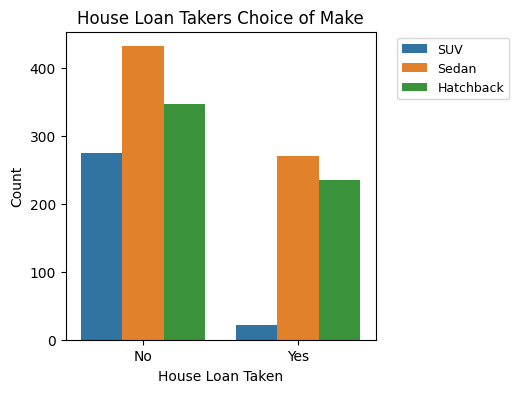

In [333]:
plt.figure(figsize=[4,4])
plt.title("House Loan Takers Choice of Make")
plt.ylabel('Count')
plt.xlabel('House Loan Taken')
sns.countplot(data=df, x='House_loan', hue='Make');
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=9);

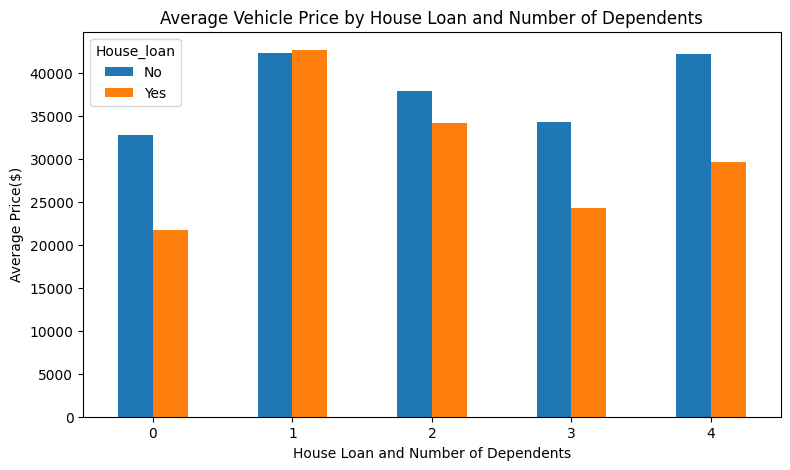

In [88]:
df.groupby(['No_of_Dependents','House_loan'])['Price'].mean().unstack().plot(kind='bar', figsize=(9, 5));
plt.title("Average Vehicle Price by House Loan and Number of Dependents")
plt.ylabel('Average Price($)')
plt.xlabel('House Loan and Number of Dependents')
plt.xticks(rotation=0);

In [108]:
df[(df['Personal_loan']=='Yes')&(df['House_loan']=='Yes')]['Personal_loan'].count()

278

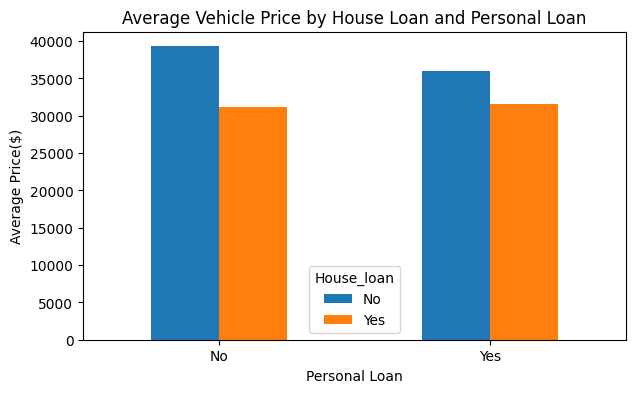

In [113]:
df.groupby(['Personal_loan','House_loan'])['Price'].mean().unstack().plot(kind='bar', figsize=(7, 4));
plt.title("Average Vehicle Price by House Loan and Personal Loan")
plt.ylabel('Average Price($)')
plt.xlabel('Personal Loan')
plt.xticks(rotation=0);

In [49]:
(pd.crosstab(index=df['House_loan'], columns=df['Make'], normalize='index', margins=True)*100).round(1)

Make,Hatchback,SUV,Sedan
House_loan,,,
No,32.9,26.1,41.0
Yes,44.6,4.2,51.2
All,36.8,18.8,44.4


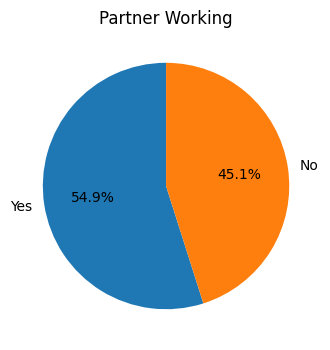

In [338]:
plt.figure(figsize=[4,4])
plt.title("Partner Working")
pwork = df['Partner_working'].value_counts(normalize=True) * 100
plt.pie(pwork, labels=pwork.index, autopct='%1.1f%%', startangle=90);

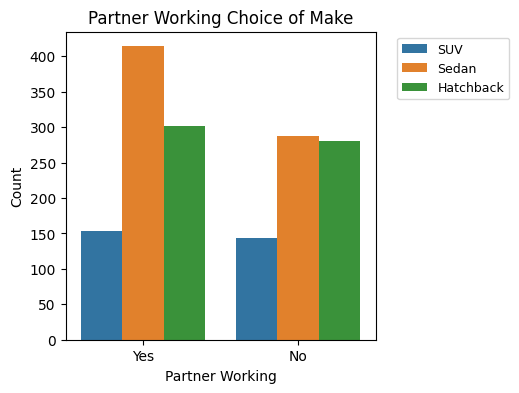

In [339]:
plt.figure(figsize=[4,4])
plt.title("Partner Working Choice of Make")
plt.ylabel('Count')
plt.xlabel('Partner Working')
sns.countplot(data=df, x='Partner_working', hue='Make');
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=9);

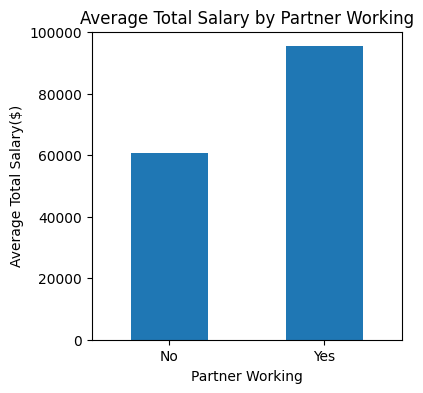

In [118]:
df.groupby('Partner_working')['Total_salary'].mean().plot(kind='bar', figsize=(4, 4));
plt.title("Average Total Salary by Partner Working")
plt.ylabel('Average Total Salary($)')
plt.xlabel('Partner Working')
plt.xticks(rotation=0);

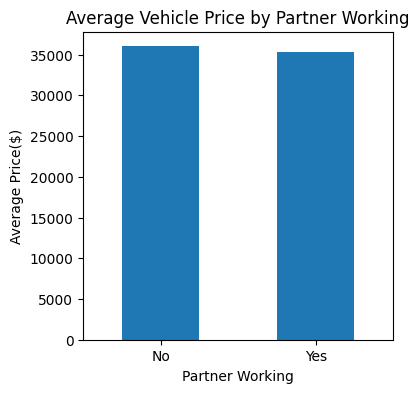

In [119]:
df.groupby('Partner_working')['Price'].mean().plot(kind='bar', figsize=(4, 4));
plt.title("Average Vehicle Price by Partner Working")
plt.ylabel('Average Price($)')
plt.xlabel('Partner Working')
plt.xticks(rotation=0);

In [50]:
(pd.crosstab(index=df['Partner_working'], columns=df['Make'], normalize='index', margins=True)*100).round(1)

Make,Hatchback,SUV,Sedan
Partner_working,,,
No,39.4,20.2,40.4
Yes,34.7,17.6,47.7
All,36.8,18.8,44.4


In [ ]:
df.groupby(['Partner_working','Make'])['Make'].count().unstack().plot(kind='bar', figsize=(4, 4));
plt.title("Choice of Car by Partner Working")
plt.ylabel('Count')
plt.xlabel('Partner Working')
plt.xticks(rotation=0);

In [ ]:
plt.figure(figsize=[4,4])
plt.title("Distribution of Makes of Vehicles")
make = df['Make'].value_counts(normalize=True) * 100
plt.pie(make, labels=make.index, autopct='%1.1f%%', startangle=90);

In [ ]:
#average vehicle price by make
plt.figure(figsize=(4,4))
plt.title("Average Vehicle Price by Make")
plt.xlabel('Make')
plt.ylabel('Price($)')
df.groupby('Make')['Price'].mean().plot(kind='bar');
plt.xticks(rotation=0);

# 3. Bivariate Analysis

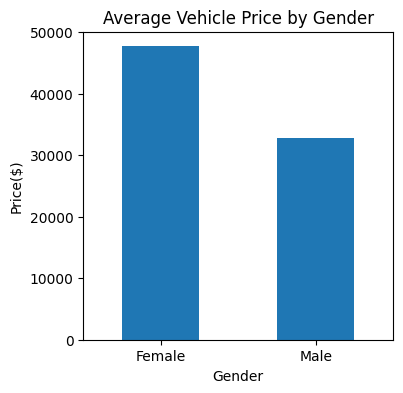

In [355]:
plt.figure(figsize=(4,4))
plt.title("Average Vehicle Price by Gender")
plt.xlabel('Gender')
plt.ylabel('Price($)')
df.groupby('Gender')['Price'].mean().plot(kind='bar');
plt.xticks(rotation=0);

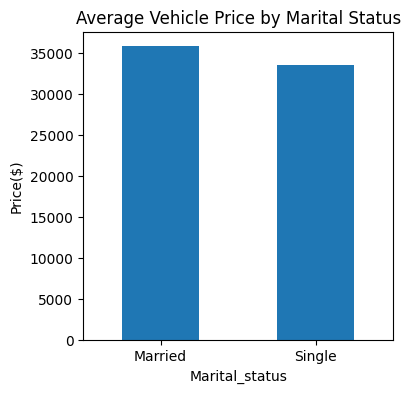

In [13]:
#average vehicle price by marital status
plt.figure(figsize=(4,4))
plt.title("Average Vehicle Price by Marital Status")
plt.xlabel('Marital Status')
plt.ylabel('Price($)')
df.groupby('Marital_status')['Price'].mean().plot(kind='bar');
plt.xticks(rotation=0);

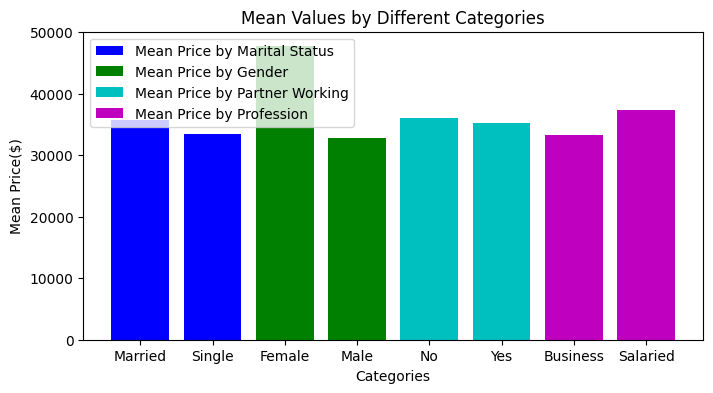

In [152]:
mean_price_by_marital = df.groupby('Marital_status')['Price'].mean()
mean_price_by_gender = df.groupby('Gender')['Price'].mean()
mean_price_by_partner = df.groupby('Partner_working')['Price'].mean()
mean_price_by_profession = df.groupby('Profession')['Price'].mean()

# Plot all series on one chart
plt.figure(figsize=(8, 4))

# Plot mean Price by Marital Status
plt.bar(mean_price_by_marital.index, mean_price_by_marital, label='Mean Price by Marital Status', color='blue')

# Plot mean Price by Gender
plt.bar(mean_price_by_gender.index, mean_price_by_gender, label='Mean Price by Gender', color='green')
plt.bar(mean_price_by_partner.index, mean_price_by_partner, label='Mean Price by Partner Working', color='c')
plt.bar(mean_price_by_profession.index, mean_price_by_profession, label='Mean Price by Profession', color='m')

# Customize the chart
plt.title('Mean Values by Different Categories')
plt.xlabel('Categories')
plt.ylabel('Mean Price($)')
plt.legend()

# Show the combined plot
plt.show()

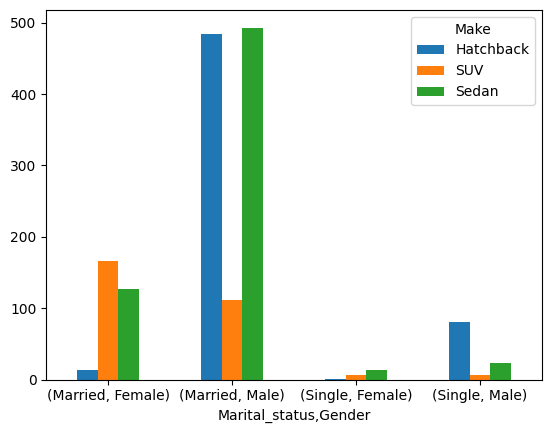

In [58]:
df.groupby(['Marital_status', 'Gender', 'Make'])['Make'].count().unstack().plot(kind='bar');
plt.xticks(rotation=0);

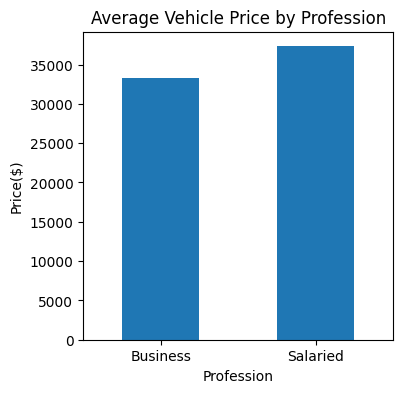

In [14]:
#average vehicle price by profession
plt.figure(figsize=(4,4))
plt.title("Average Vehicle Price by Profession")
plt.xlabel('Profession')
plt.ylabel('Price($)')
df.groupby('Profession')['Price'].mean().plot(kind='bar');
plt.xticks(rotation=0);

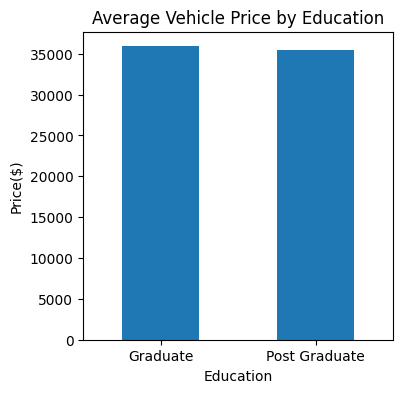

In [16]:
#average vehicle price by education
plt.figure(figsize=(4,4))
plt.title("Average Vehicle Price by Education")
plt.xlabel('Education')
plt.ylabel('Price($)')
df.groupby('Education')['Price'].mean().plot(kind='bar');
plt.xticks(rotation=0);

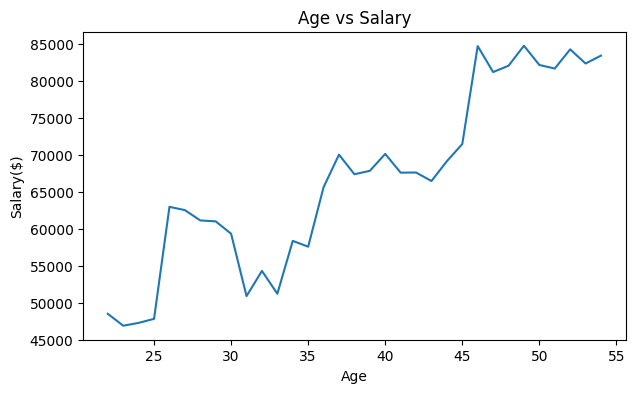

In [121]:
plt.figure(figsize=(7,4))
plt.title("Age vs Salary")
plt.xlabel('Age')
plt.ylabel('Salary($)')
sns.lineplot(data=df, x='Age', y='Salary', errorbar=None);
plt.xticks(rotation=0);

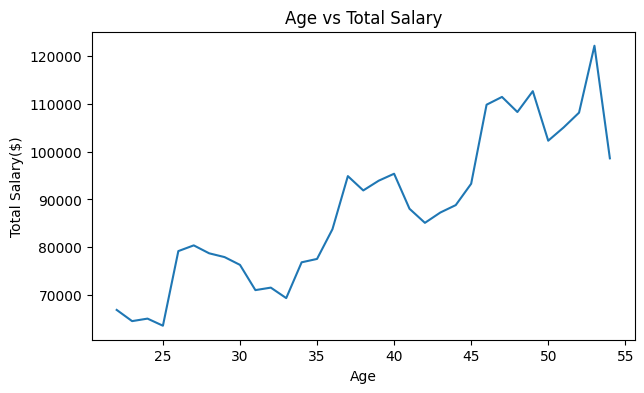

In [120]:
plt.figure(figsize=(7,4))
plt.title("Age vs Total Salary")
plt.xlabel('Age')
plt.ylabel('Total Salary($)')
sns.lineplot(data=df, x='Age', y='Total_salary', errorbar=None);
plt.xticks(rotation=0);

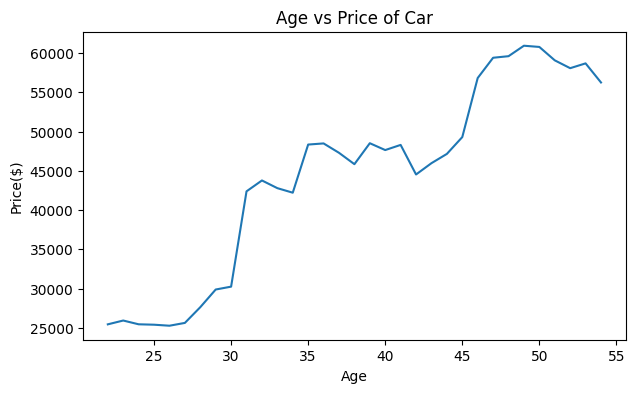

In [122]:
plt.figure(figsize=(7,4))
plt.title("Age vs Price of Car")
plt.xlabel('Age')
plt.ylabel('Price($)')
sns.lineplot(data=df, x='Age', y='Price', errorbar=None);
plt.xticks(rotation=0);

In [6]:
dfnum = df[['Age','No_of_Dependents','Salary','Partner_salary','Total_salary','Price']]

In [7]:
dfnum.head()

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
0,53,4,99300,70700.0,170000,61000
1,53,4,95500,70300.0,165800,61000
2,53,3,97300,60700.0,158000,57000
3,53,2,72500,70300.0,142800,61000
4,53,3,79700,60200.0,139900,57000


In [43]:
dfnum_corr = (dfnum.corr()).round(2)
dfnum_corr

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
Age,1.00,-0.19,0.62,0.13,0.46,0.80
No_of_Dependents,-0.19,1.00,-0.03,0.13,0.09,-0.14
Salary,0.62,-0.03,1.00,0.07,0.64,0.41
Partner_salary,0.13,0.13,0.07,1.00,0.81,0.17
Total_salary,0.46,0.09,0.64,0.81,1.00,0.37
Price,0.80,-0.14,0.41,0.17,0.37,1.00


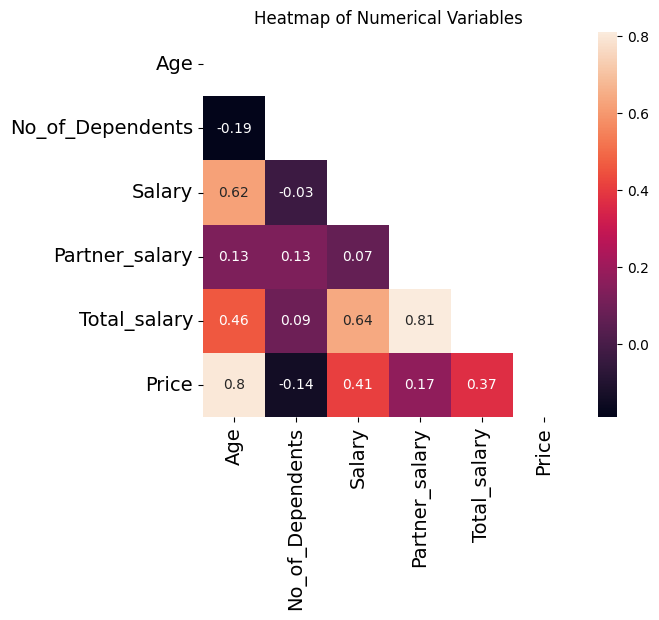

In [100]:
plt.figure(figsize=(6,5))
plt.title("Heatmap of Numerical Variables")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.heatmap(data=dfnum_corr, annot=True, mask=np.triu(dfnum_corr));

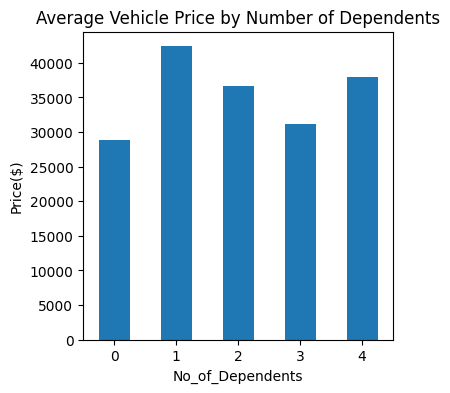

In [21]:
plt.figure(figsize=(4,4))
plt.title("Average Vehicle Price by Number of Dependents")
plt.xlabel('No. of Dependents')
plt.ylabel('Price($)')
df.groupby('No_of_Dependents')['Price'].mean().plot(kind='bar');
plt.xticks(rotation=0);

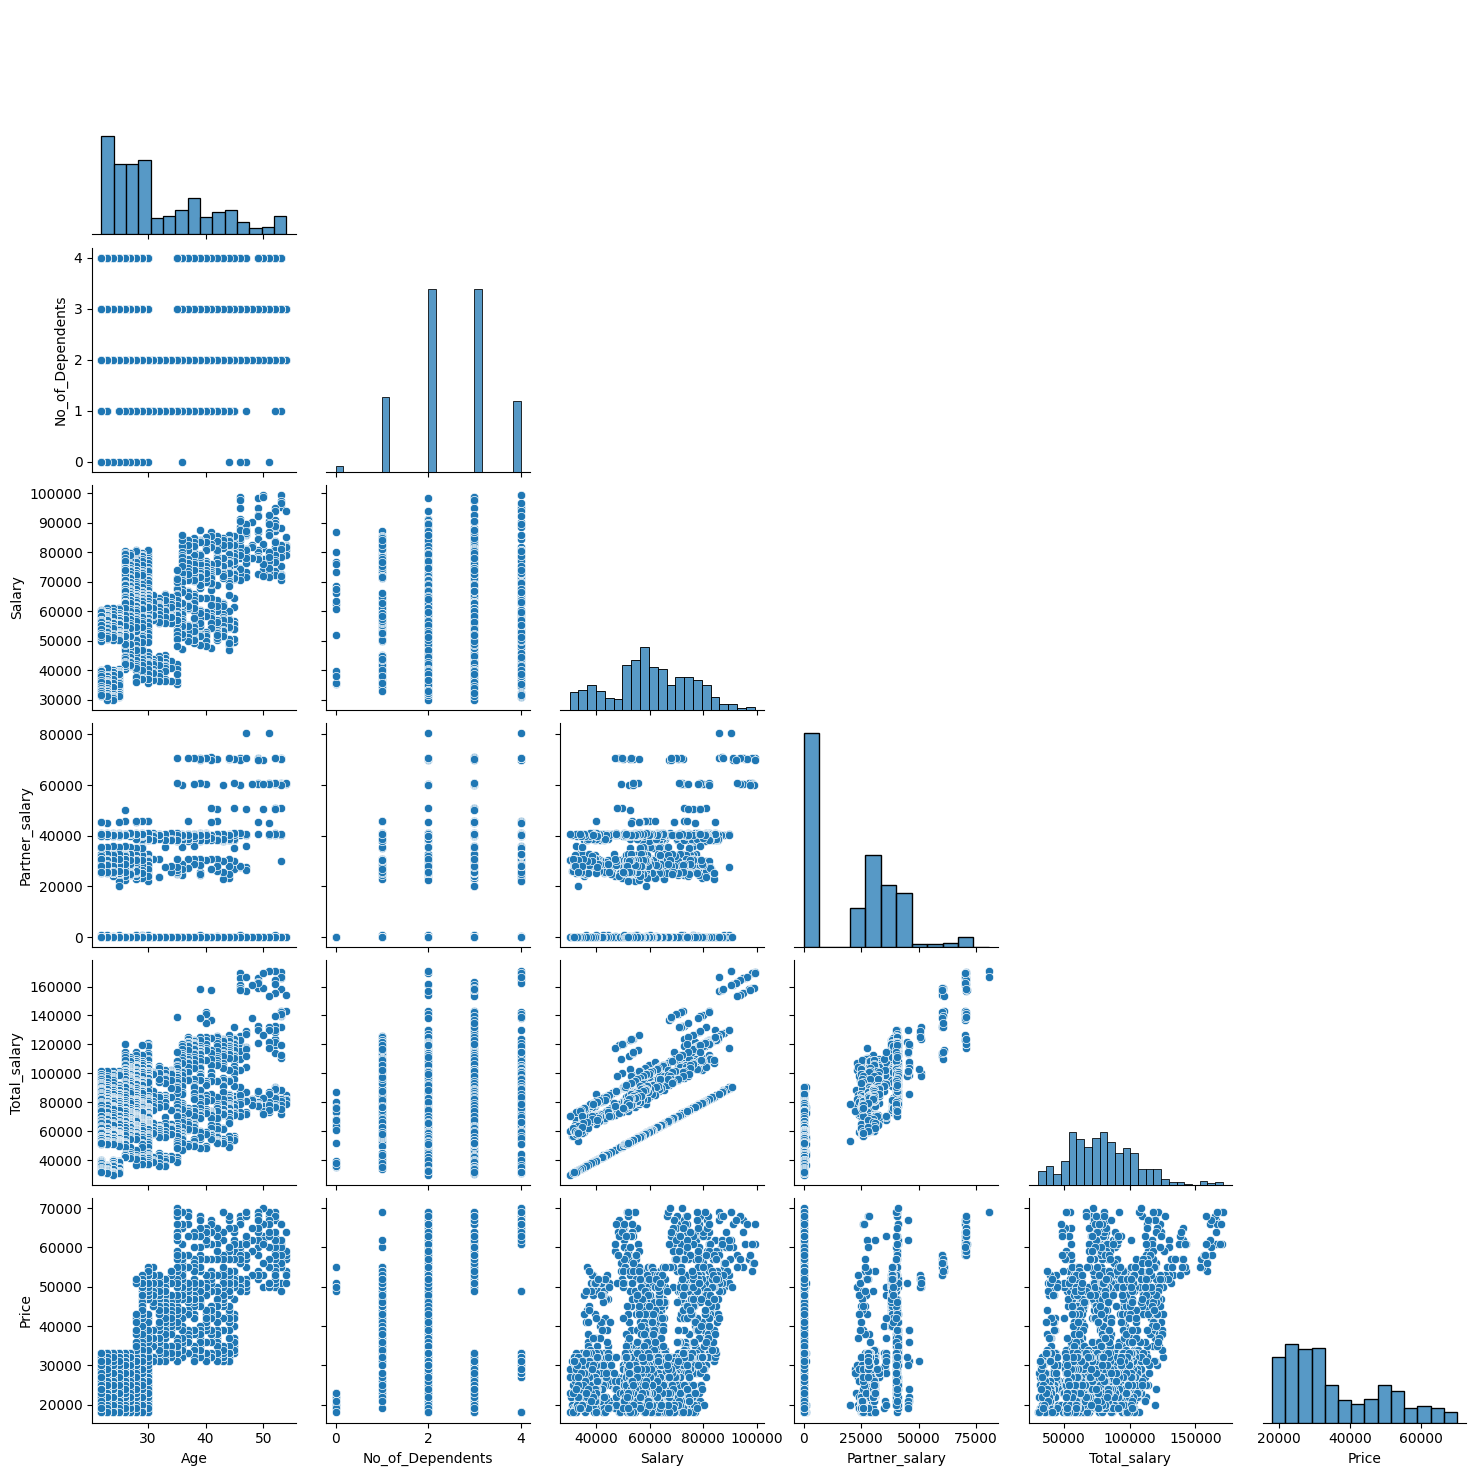

In [17]:
sns.pairplot(dfnum, corner=True);

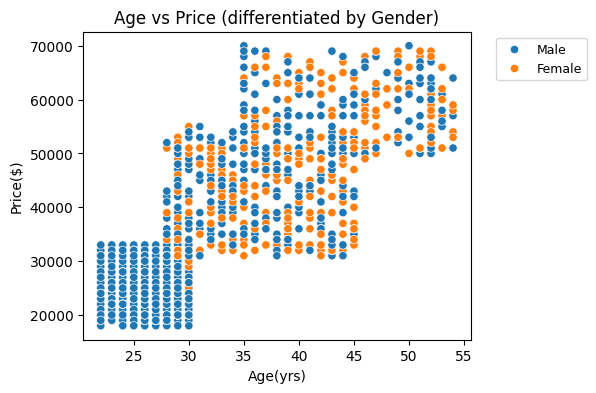

In [20]:
plt.figure(figsize=(5,4))
plt.title("Age vs Price (differentiated by Gender)")
plt.xlabel('Age(yrs)')
plt.ylabel('Price($)')
sns.scatterplot(data=df, x='Age', y='Price', hue='Gender');
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=9);

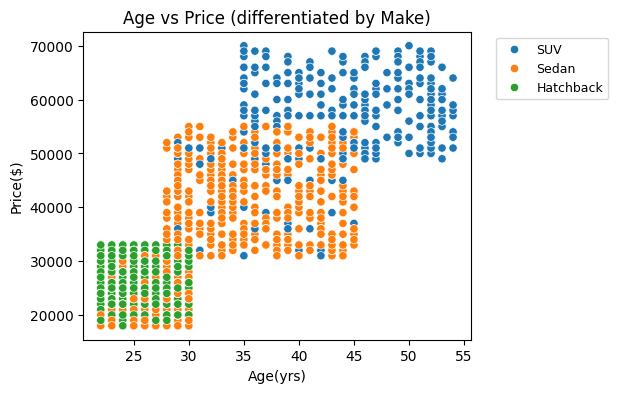

In [153]:
plt.figure(figsize=(5,4))
plt.title("Age vs Price (differentiated by Make)")
plt.xlabel('Age(yrs)')
plt.ylabel('Price($)')
sns.scatterplot(data=df, x='Age', y='Price', hue='Make`');
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=9);

In [ ]:
plt.figure(figsize=(5,4))
plt.title("Salary vs Price (differentiated by Gender)")
plt.xlabel('Salary($)')
plt.ylabel('Price($)')
sns.scatterplot(data=df, x='Salary', y='Price', hue='Gender');
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=9);

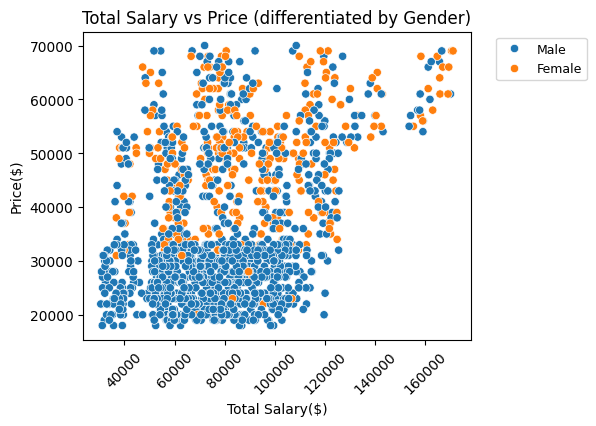

In [69]:
plt.figure(figsize=(5,4))
plt.title("Total Salary vs Price (differentiated by Gender)")
plt.xlabel('Total Salary($)')
plt.ylabel('Price($)')
plt.xticks(rotation=45)
sns.scatterplot(data=df, x='Total_salary', y='Price', hue='Gender');
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=9);

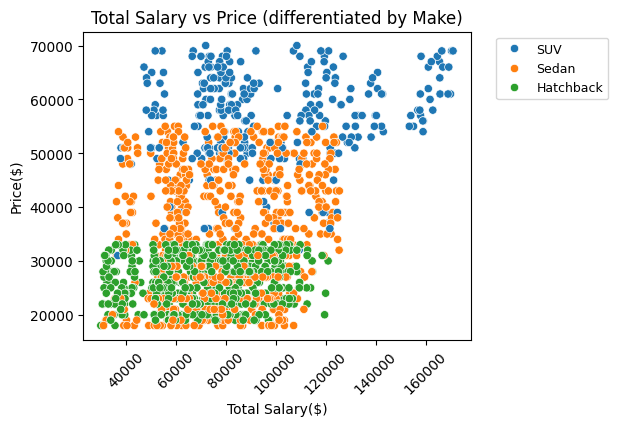

In [154]:
plt.figure(figsize=(5,4))
plt.title("Total Salary vs Price (differentiated by Make)")
plt.xlabel('Total Salary($)')
plt.ylabel('Price($)')
plt.xticks(rotation=45)
sns.scatterplot(data=df, x='Total_salary', y='Price', hue='Make');
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=9);

# 4. Key Questions

## 4.1 Do men tend to prefer SUVs more compared to women?

In [294]:
(pd.crosstab(index=df['Gender'], columns=df['Make'], margins=True, normalize='index')*100).round(1)

Make,Hatchback,SUV,Sedan
Gender,,,
Female,4.6,52.6,42.9
Male,47.1,9.8,43.0
All,38.0,19.0,43.0


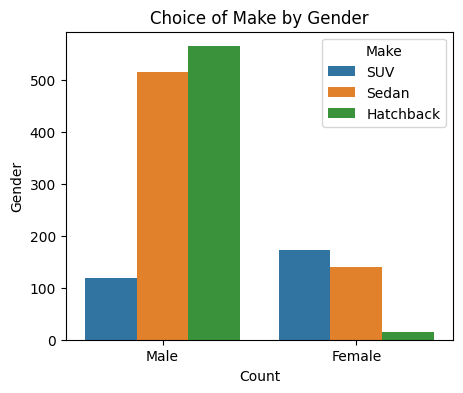

In [123]:
plt.figure(figsize=(5,4))
plt.title("Choice of Make by Gender")
plt.xlabel('Count')
plt.ylabel('Gender')
sns.countplot(data=df, x='Gender', hue='Make');

## 4.2 What is the likelihood of a salaried person buying a Sedan?

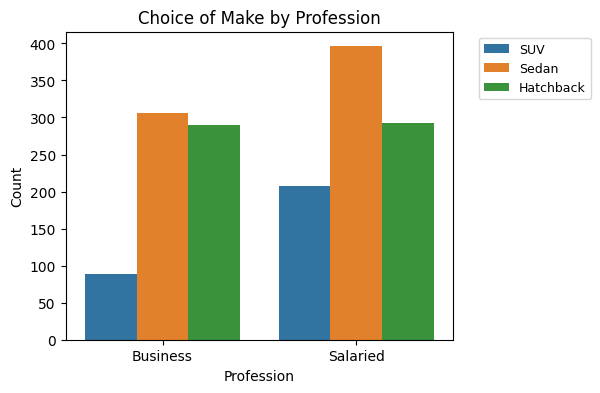

In [124]:
plt.figure(figsize=(5,4))
plt.title("Choice of Make by Profession")
plt.ylabel('Count')
plt.xlabel('Profession')
sns.countplot(data=df, x='Profession', hue='Make');
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=9);

In [188]:
# df.groupby(['Profession','Make']).size()
df[(df['Profession']=='Salaried') & (df['Make'] == 'Sedan')]['Make'].count()

396

In [181]:
df['Make'].value_counts()

Make
Sedan        702
Hatchback    582
SUV          297
Name: count, dtype: int64

**Likelihood of salaried person owning a sedan is 396 / 702 or 56.4%**

## 4.3 What evidence or data supports Sheldon Cooper's claim that a salaried male is an easier target for a SUV sale over a Sedan sale?

In [126]:
make_counts = df[(df['Profession']=='Salaried') & (df['Gender'] == 'Male')]['Make'].value_counts().reset_index()
make_counts.columns = ['Make' , 'Count']

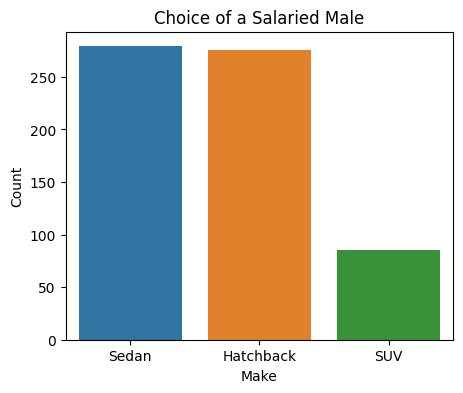

In [127]:
plt.figure(figsize=(5,4))
plt.title("Choice of a Salaried Male")
plt.xlabel('Make')
plt.ylabel('Count')
sns.barplot(data=make_counts, x='Make', y='Count', hue='Make');

## 4.4 How does the the amount spent on purchasing automobiles vary by gender?

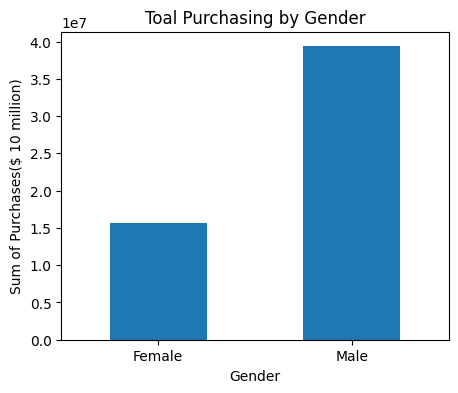

In [78]:
plt.figure(figsize=(5,4))
plt.title("Toal Purchasing by Gender")
plt.ylabel('Sum of Purchases($ 10 million)')
plt.xlabel('Gender')
df.groupby('Gender')['Price'].sum().plot(kind='bar');
plt.xticks(rotation=0);

## 4.5 How much money was spent on purchasing automobiles by individuals who took a personal loan?

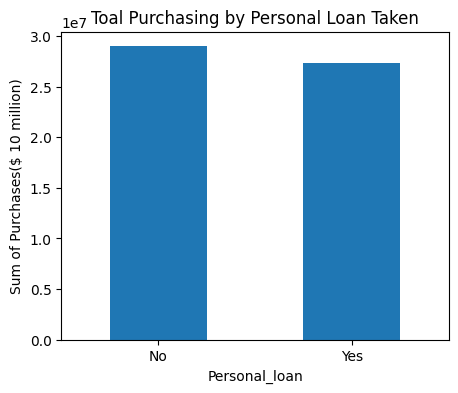

In [80]:
plt.figure(figsize=(5,4))
plt.title("Toal Purchasing by Personal Loan Taken")
plt.ylabel('Sum of Purchases($ 10 million)')
plt.xlabel('Personal Loan Taken')
df.groupby('Personal_loan')['Price'].sum().plot(kind='bar');
plt.xticks(rotation=0);

## 4.6 How does having a working partner influence the purchase of higher-priced cars?

In [206]:
df[df['Price'] > 40000]['Price'].count()

508

In [130]:
df_higherprice = df[df['Price'] > 40000]

In [131]:
df_higherprice.groupby('Partner_working')['Price'].mean().reset_index()
df_higherprice.groupby('Partner_working')['Price'].sum().reset_index()

,Partner_working,Price
0,No,12625000
1,Yes,14378000


Text(0.5, 1.0, 'Higher Price Mean')

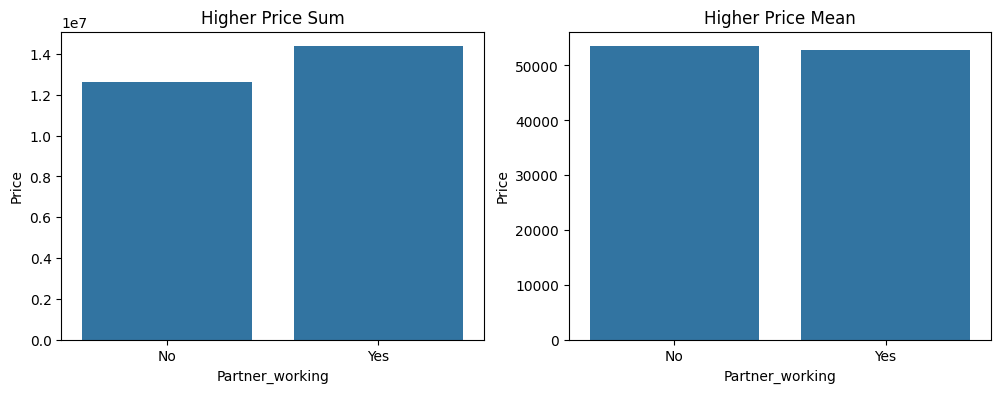

In [132]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.barplot(x='Partner_working', y='Price', data=df_higherprice.groupby('Partner_working')['Price'].sum().reset_index(), ax=axes[0])
axes[0].set_title('Higher Price Sum')
sns.barplot(x='Partner_working', y='Price', data=df_higherprice.groupby('Partner_working')['Price'].mean().reset_index(), ax=axes[1])
axes[1].set_title('Higher Price Mean')